#### Librerías

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import openpyxl
import pickle
from mylibrary               import WOE
from sklearn.linear_model    import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics         import roc_auc_score

%matplotlib inline
pd.set_option('display.max_columns',40)

#### Lectura de datasets

Leemos los archivos y revisamos su tamaño

In [2]:
df_cus = pd.read_parquet('/home/angelica/venvs/practicaPy3/Bankaya/Datasets/main_dataset.parquet') 
df_bc = pd.read_parquet('/home/angelica/venvs/practicaPy3/Bankaya/Datasets/credit_reports.parquet') 

In [3]:
df_cus.head()

,LOAN_ID,CUSTOMER_ID,ACC_CREATION_DATETIME,APPLICATION_DATETIME,LOAN_ORIGINATION_DATETIME,FINANCED_AMOUNT,LOAN_TERM_MONTHLY,LOAN_TYPE,max_days_late,target,account_to_application_days,n_sf_apps,first_app_date,last_app_date,n_bnpl_apps,n_bnpl_approved_apps,first_bnpl_app_date,last_bnpl_app_date,n_inquiries,n_inquiries_l3m,n_inquiries_l6m,has_sf,has_bnpl,has_inquiries,split_class
0,149900,710278,2022-03-19 19:36:28,2022-05-23 07:00:00,2022-07-07 17:31:33,2100.0,6,ARRENDAMIENTO,6,0,64,1.0,2022-03-31,2022-03-31,1.0,0.0,2022-04-01 00:32:50.349,2022-04-01 00:32:50.349,14.0,14.0,14.0,1.0,1.0,1.0,train
1,153090,825235,2022-05-22 15:34:38,2022-05-22 07:00:00,2022-07-02 14:31:01,3999.0,3,ARRENDAMIENTO,63,1,0,NaN,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN,NaN,0.0,0.0,0.0,train
2,154685,811344,2022-05-12 12:21:32,2022-05-12 07:00:00,2022-07-11 17:31:12,2700.0,3,ARRENDAMIENTO,70,1,0,NaN,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN,NaN,0.0,0.0,0.0,train
3,154770,254246,2021-09-06 10:16:54,2022-06-22 07:00:00,2022-07-03 18:34:29,4769.0,6,ARRENDAMIENTO,5,0,288,NaN,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN,NaN,0.0,0.0,0.0,train
4,154847,622857,2022-02-14 21:26:27,2022-06-23 07:00:00,2022-07-02 16:03:31,2880.0,12,ARRENDAMIENTO,54,1,128,2.0,2022-02-14,2022-02-15,NaN,NaN,NaT,NaT,6.0,0.0,6.0,1.0,0.0,1.0,train


In [4]:
df_cus.shape

(14454, 25)

In [5]:
df_bc.head()

,CUSTOMER_ID,INQUIRY_TIME,LOAN_ID,LOAN_APPLICATION_ID,LOAN_APPLICATION_DATE,CDC_INQUIRY_ID,INQUIRY_DATE,PREVENTION_KEY,CURRENCY,MAX_CREDIT,CREDIT_LIMIT,PAYMENT_AMOUNT,UPDATE_DATE,LOAN_OPENING_DATE,LOAN_CLOSING_DATE,WORST_DELAY_DATE,REPORT_DATE,LAST_PURCHASE_DATE,LAST_PAYMENT_DATE,PAYMENT_FREQUENCY,BUSINESS_TYPE,CREDIT_TYPE,ACCOUNT_TYPE,RESPONSABILITY_TYPE,TOTAL_PAYMENTS,DELAYED_PAYMENTS,CURRENT_PAYMENT,WORST_DELAY,TOTAL_REPORTED_PAYMENTS,CURRENT_BALANCE,BALANCE_DUE,BALANCE_DUE_WORST_DELAY
0,710278,2022-04-01 00:32:36.689000+00:00,149900,866f9a8e52c5a156233740074f56952b,2022-05-23 07:00:00,710278-27993a6e-2885-48d4-a753-9249e7022af1,2022-04-01,SIN OBSERVACION,PESOS MEXICANOS,1244.0,9900.0,1244.0,2022-02-28,2019-08-30,NaT,2022-01-31,2022-02-28,2019-08-30,2020-08-18,MENSUAL,TIENDA DEPARTAMENTAL,APARATOS/MUEBLES,PAGOS FIJOS,INDIVIDUAL (TITULAR),12.0,7,13,13.0,0,1244.0,1244.0,1244.0
1,710278,2022-04-01 00:32:36.689000+00:00,149900,866f9a8e52c5a156233740074f56952b,2022-05-23 07:00:00,710278-27993a6e-2885-48d4-a753-9249e7022af1,2022-04-01,SIN OBSERVACION,PESOS MEXICANOS,1722.0,9900.0,1722.0,2022-02-28,2020-04-21,NaT,2021-12-31,2022-02-28,2020-04-21,2020-08-18,PAGO MINIMO PARA CUENTAS REVOLVENTES,TIENDA DEPARTAMENTAL,LINEA DE CREDITO,REVOLVENTE,INDIVIDUAL (TITULAR),0.0,3,13,13.0,0,1722.0,1722.0,1722.0
2,710278,2022-04-01 00:32:36.689000+00:00,149900,866f9a8e52c5a156233740074f56952b,2022-05-23 07:00:00,710278-27993a6e-2885-48d4-a753-9249e7022af1,2022-04-01,SIN OBSERVACION,PESOS MEXICANOS,6346.0,0.0,482.0,2022-03-28,2021-12-17,NaT,NaT,2022-03-28,2021-12-17,2022-03-26,SEMANAL,BANCOS,PRESTAMO PERSONAL,PAGOS FIJOS,INDIVIDUAL (TITULAR),16.0,0,V,0.0,0,943.0,0.0,0.0
3,622857,2022-02-15 02:30:22.086000+00:00,154847,2498fb8c86bf283501daa7bbfcdaa60f,2022-06-23 07:00:00,622857-6b4e9d95-7491-40c3-bccd-442de7f94c58,2022-02-15,SIN OBSERVACION,PESOS MEXICANOS,11600.0,0.0,232.0,2022-02-01,2021-03-02,NaT,2022-01-04,2022-02-01,2021-03-02,2022-01-25,SEMANAL,TIENDA DE ROPA,PRESTAMO PERSONAL,PAGOS FIJOS,INDIVIDUAL (TITULAR),100.0,4,01,1.0,0,6185.0,116.0,116.0
4,875073,2022-06-25 01:57:14.868000+00:00,155561,865b3ed9964ee2ccfffd5401ca00c08d,2022-06-26 07:00:00,875073-46a5f149-19db-4193-b92a-b8f41fb3e896,2022-06-25,SIN OBSERVACION,PESOS MEXICANOS,2452.0,16800.0,2452.0,2021-09-30,2019-02-22,NaT,2020-08-31,2021-09-30,2019-04-16,2019-06-12,PAGO MINIMO PARA CUENTAS REVOLVENTES,TIENDA DEPARTAMENTAL,LINEA DE CREDITO,REVOLVENTE,INDIVIDUAL (TITULAR),0.0,19,13,13.0,0,2452.0,2452.0,2452.0


In [6]:
df_bc.shape

(287356, 32)

** Definiciones de variables que no estaban y se consultaron con Bankaya

main_dataset.parquet
* 'n_inquiries': número de consultas de entidades externas
* 'has_sf': tiene crédito de smartphone (0=no,1=sí)
* 'has_bnpl': tiene crédito de buy now pay later
* 'has_inquiries': tiene consultas de entidades externas
* 'split_class': indica que es el segmento de entrenamiento

credit_reports.parquet
* 'LOAN_APPLICATION_ID': id del crédito en buró
* 'LOAN_APPLICATION_DATE': fecha de la aplicación del crédito en buró
* 'INQUIRY_DATE': fecha de consulta 

* Primero filtramos las columnas que se pueden obtener sin ser cliente de Bankaya (Clientes nuevos) y también filtramos sólo los clientes que han tenido créditos para SF para asegurarnos de tener la misma población y los mismos valores según el tipo de producto (de lo contrario el modelo podría no funcionar adecuadamente).

Nota. Se considera que el monto financiado, es el monto que se pide en la solicitud del crédito.

In [7]:
df_newcus = df_cus[df_cus['has_sf']==1][['LOAN_ID','CUSTOMER_ID','ACC_CREATION_DATETIME','APPLICATION_DATETIME','FINANCED_AMOUNT','LOAN_TERM_MONTHLY',
'account_to_application_days','n_inquiries','n_inquiries_l3m','n_inquiries_l6m','target']].copy()

Observaciones. No se utliza la variable 'LOAN_TYPE' porque sólo tiene un valor y tampoco se utiliza la variable 'has_inquiries' porque a pesar de parecer que '0' significa que no tiene consultas, en los campos de 'n_inquiries_l3m' y 'n_inquiries_l6m' sí aparecen valores.

El dataset nos queda con 6,806 créditos y 11 columnas.

In [8]:
df_newcus.shape

(6806, 11)

No se utilizan los datos de Buró de Crédito porque no hay datos del histórico, sólo de los créditos otorgados por Bankaya, por lo que es información que no se tendría para clientes nuevos. 

Si quisieramos usar la información de Buró de Crédito, se necesitaría el histórico sin considerar los créditos de Bankaya.

In [9]:
#Validamos la cantidad de eventos y no eventos
df_newcus['target'].value_counts(normalize=True)

target
0    0.799295
1    0.200705
Name: proportion, dtype: float64

#### Análisis exploratorio

In [10]:
df_newcus.describe(percentiles=[.01,.25,.5,.75,.99]).round(2)

,LOAN_ID,CUSTOMER_ID,ACC_CREATION_DATETIME,APPLICATION_DATETIME,FINANCED_AMOUNT,LOAN_TERM_MONTHLY,account_to_application_days,n_inquiries,n_inquiries_l3m,n_inquiries_l6m,target
count,6806.00,6806.00,6806,6806,6806.00,6806.00,6806.00,6412.00,6412.00,6412.00,6806.0
mean,266169.93,681029.84,2022-04-13 12:17:56.318248,2022-12-09 09:17:30.484866,4050.93,9.35,239.27,29.96,8.22,16.03,0.2
min,149900.00,102.00,2020-10-14 18:22:10,2022-04-26 07:00:00,1000.00,3.00,0.00,1.00,0.00,0.00,0.0
1%,158667.15,11168.10,2021-01-11 22:18:23.950000,2022-05-06 07:00:00,2024.25,3.00,1.00,1.00,0.00,0.00,0.0
25%,240501.50,393740.75,2021-11-05 14:48:15.750000,2022-11-29 14:00:00,2999.00,6.00,97.00,12.00,0.00,0.00,0.0
50%,266394.50,772347.50,2022-04-22 18:28:31.500000,2022-12-25 08:00:00,3927.38,12.00,200.00,23.00,0.00,4.00,0.0
75%,304535.50,968541.50,2022-09-22 18:47:04.250000,2023-02-01 08:00:00,4899.00,12.00,351.00,40.00,5.00,25.00,0.0
99%,356814.90,1146244.00,2023-04-02 20:50:43.250000,2023-04-23 07:00:00,8199.00,12.00,700.95,125.00,82.00,102.00,1.0
max,383998.00,1188445.00,2023-05-12 14:39:39,2023-05-26 07:00:00,8998.75,12.00,901.00,191.00,170.00,170.00,1.0
std,52354.87,328705.68,NaN,NaN,1323.47,3.10,174.47,25.33,18.57,23.69,0.4


###### En el análisis exploratorio notamos que:
- No tenemos problemas de nulos, salvo en las variables de las consultas, pero la falta de información nos indica que son clientes que no tienen Buró de Crédito y eso lo podemos utilizar en el modelo, además de que representan menos del 10% de los datos.
- Tampoco tenemos problemas con outliers, aunque hay que analizar el caso de las consultas de Buró de Crédito.

#### Creación de varibales

Debido a la poca información que tenemos, construimos algunas variables para poder alimentar al modelo.

In [11]:
df_newcus['MONTHLY_PAYMENT'] = df_newcus['FINANCED_AMOUNT']/df_newcus['LOAN_TERM_MONTHLY']

df_newcus['HAS_BC'] = df_newcus['n_inquiries_l3m'].fillna('na').map(lambda x: 0 if x=='na' else 1)

df_newcus['PCT_3MINQ_TINQ'] = df_newcus['n_inquiries_l3m']/df_newcus['n_inquiries']
df_newcus['PCT_6MINQ_TINQ'] = df_newcus['n_inquiries_l6m']/df_newcus['n_inquiries']
df_newcus['PCT_3MINQ_6MINQ'] = [0 if (np.isnan(x) and not np.isnan(y)) or y==0 else x/y for x,y in zip(df_newcus['n_inquiries_l3m'],df_newcus['n_inquiries_l6m'])]

df_newcus['CREATION_MONTH'] = df_newcus['ACC_CREATION_DATETIME'].map(lambda x: x.month)
df_newcus['APPLICATION_MONTH'] = df_newcus['APPLICATION_DATETIME'].map(lambda x: x.month)

df_newcus['CREATION_HOUR'] = df_newcus['ACC_CREATION_DATETIME'].map(lambda x: x.hour)
df_newcus['APPLICATION_HOUR'] = df_newcus['APPLICATION_DATETIME'].map(lambda x: x.hour)

df_newcus['account_to_application_hours'] = [i.total_seconds()/3600 for i in (df_newcus['APPLICATION_DATETIME']-df_newcus['ACC_CREATION_DATETIME'])]
df_newcus['WEEKDAY'] = df_newcus['ACC_CREATION_DATETIME'].map(lambda x: x.weekday())

df_newcus['PCT_AMOUNT_TAMOUNT'] = df_newcus['FINANCED_AMOUNT'].map(lambda x: x/sum(df_newcus['FINANCED_AMOUNT']))
df_newcus['PCT_AMOUNT_MEAN_AMOUNT'] = df_newcus['FINANCED_AMOUNT'].map(lambda x: x/df_newcus['FINANCED_AMOUNT'].mean())

df_newcus['PCT_AMOUNT_TAMOUNT_E'] = df_newcus['FINANCED_AMOUNT'].map(lambda x: x/sum(df_newcus[df_newcus['target']==1]['FINANCED_AMOUNT']))
df_newcus['PCT_AMOUNT_MEAN_AMOUNT_E'] = df_newcus['FINANCED_AMOUNT'].map(lambda x: x/df_newcus[df_newcus['target']==1]['FINANCED_AMOUNT'].mean())
df_newcus['PCT_AMOUNT_TAMOUNT_NE'] = df_newcus['FINANCED_AMOUNT'].map(lambda x: x/sum(df_newcus[df_newcus['target']==0]['FINANCED_AMOUNT']))
df_newcus['PCT_AMOUNT_MEAN_AMOUNT_NE'] = df_newcus['FINANCED_AMOUNT'].map(lambda x: x/df_newcus[df_newcus['target']==0]['FINANCED_AMOUNT'].mean())

El dataset nos queda con 6,806 créditos y 28 columnas, lo que quiere decir que construimos 17 variables nuevas (más de la mitad son variables nuevas).

In [12]:
df_newcus.shape

(6806, 28)

#### Segmentación de variables

Separamos las variables según su categória, es decir, si son continuas o discretas, y también la variable objetivo.

In [13]:
# Variables continuas
lstc = ['FINANCED_AMOUNT', 'LOAN_TERM_MONTHLY','account_to_application_days', 'n_inquiries', 'n_inquiries_l3m','n_inquiries_l6m', 
        'MONTHLY_PAYMENT','PCT_3MINQ_TINQ', 'PCT_6MINQ_TINQ', 'PCT_3MINQ_6MINQ','account_to_application_hours',
        'PCT_AMOUNT_TAMOUNT','PCT_AMOUNT_MEAN_AMOUNT','PCT_AMOUNT_TAMOUNT_E','PCT_AMOUNT_MEAN_AMOUNT_E','PCT_AMOUNT_TAMOUNT_NE',
        'PCT_AMOUNT_MEAN_AMOUNT_NE']

In [14]:
# Variables discretas (consideramos variables discretas a las cadenas, las variables finitas (por ejemplo, en el caso de lso meses, sólo podemos tener valores entre 1 y 12), etc.)
lstd = ['HAS_BC','CREATION_MONTH', 'APPLICATION_MONTH', 'CREATION_HOUR','APPLICATION_HOUR','WEEKDAY']

In [15]:
# Les agregamos un distintivo a las variables para identificarlas 
lst_columns = ['v_'+i if i in lstd else 'c_'+i if i in lstc else i for i in df_newcus.columns]
df_newcus.columns  = lst_columns

In [16]:
varc= ['c_'+i for i in lstc]
vard= ['v_'+i for i in lstd]
tgt = ['target']

In [17]:
# Creamos un nuevo dataset con las variables que vamos a utilizar, para esto quitamos los Ids y fechas
df = df_newcus[varc+vard+tgt].fillna(0).copy()

In [18]:
df.shape

(6806, 24)

#### Análisis exploratorio

In [19]:
df.describe(percentiles=[.01,.25,.5,.75,.99])

,c_FINANCED_AMOUNT,c_LOAN_TERM_MONTHLY,c_account_to_application_days,c_n_inquiries,c_n_inquiries_l3m,c_n_inquiries_l6m,c_MONTHLY_PAYMENT,c_PCT_3MINQ_TINQ,c_PCT_6MINQ_TINQ,c_PCT_3MINQ_6MINQ,c_account_to_application_hours,c_PCT_AMOUNT_TAMOUNT,c_PCT_AMOUNT_MEAN_AMOUNT,c_PCT_AMOUNT_TAMOUNT_E,c_PCT_AMOUNT_MEAN_AMOUNT_E,c_PCT_AMOUNT_TAMOUNT_NE,c_PCT_AMOUNT_MEAN_AMOUNT_NE,v_HAS_BC,v_CREATION_MONTH,v_APPLICATION_MONTH,v_CREATION_HOUR,v_APPLICATION_HOUR,v_WEEKDAY,target
count,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000
mean,4050.926581,9.348663,239.274170,28.226124,7.739788,15.102850,496.120645,0.257273,0.497208,0.257273,5756.992824,0.000147,1.000000,0.000703,0.960097,0.000186,1.010546,0.942110,7.075522,6.472671,14.969586,7.627388,2.965472,0.200705
std,1323.465499,3.103164,174.466353,25.563869,18.125508,23.295041,269.260579,0.437163,0.500029,0.437163,4187.522505,0.000048,0.326707,0.000230,0.313670,0.000061,0.330152,0.233553,3.303621,4.408035,4.968242,0.483536,2.003923,0.400557
min,1000.000000,3.000000,0.000000,0.000000,0.000000,0.000000,122.111111,0.000000,0.000000,0.000000,-16.668889,0.000036,0.246857,0.000174,0.237007,0.000046,0.249461,0.000000,1.000000,1.000000,0.000000,7.000000,0.000000,0.000000
1%,2024.250000,3.000000,1.000000,0.000000,0.000000,0.000000,190.000000,0.000000,0.000000,0.000000,36.375042,0.000073,0.499700,0.000351,0.479761,0.000093,0.504970,0.000000,1.000000,1.000000,0.000000,7.000000,0.000000,0.000000
25%,2999.000000,6.000000,97.000000,10.000000,0.000000,0.000000,319.888889,0.000000,0.000000,0.000000,2346.966875,0.000109,0.740324,0.000520,0.710783,0.000138,0.748132,1.000000,4.000000,2.000000,12.000000,7.000000,1.000000,0.000000
50%,3927.375000,12.000000,200.000000,22.000000,0.000000,0.000000,430.083333,0.000000,0.000000,0.000000,4821.641111,0.000142,0.969500,0.000681,0.930814,0.000180,0.979725,1.000000,8.000000,5.000000,15.000000,8.000000,3.000000,0.000000
75%,4899.000000,12.000000,351.000000,39.000000,2.000000,24.000000,599.833333,1.000000,1.000000,1.000000,8437.072639,0.000178,1.209353,0.000850,1.161096,0.000225,1.222107,1.000000,10.000000,12.000000,19.000000,8.000000,5.000000,0.000000
99%,8199.000000,12.000000,700.950000,123.950000,82.000000,99.000000,1599.166667,1.000000,1.000000,1.000000,16834.877778,0.000297,2.023981,0.001423,1.943218,0.000376,2.045327,1.000000,12.000000,12.000000,23.000000,8.000000,6.000000,1.000000
max,8998.750000,12.000000,901.000000,191.000000,170.000000,170.000000,2899.666667,1.000000,1.000000,1.000000,21646.073056,0.000326,2.221405,0.001561,2.132764,0.000413,2.244833,1.000000,12.000000,12.000000,23.000000,8.000000,6.000000,1.000000


In [20]:
df.corr()

,c_FINANCED_AMOUNT,c_LOAN_TERM_MONTHLY,c_account_to_application_days,c_n_inquiries,c_n_inquiries_l3m,c_n_inquiries_l6m,c_MONTHLY_PAYMENT,c_PCT_3MINQ_TINQ,c_PCT_6MINQ_TINQ,c_PCT_3MINQ_6MINQ,c_account_to_application_hours,c_PCT_AMOUNT_TAMOUNT,c_PCT_AMOUNT_MEAN_AMOUNT,c_PCT_AMOUNT_TAMOUNT_E,c_PCT_AMOUNT_MEAN_AMOUNT_E,c_PCT_AMOUNT_TAMOUNT_NE,c_PCT_AMOUNT_MEAN_AMOUNT_NE,v_HAS_BC,v_CREATION_MONTH,v_APPLICATION_MONTH,v_CREATION_HOUR,v_APPLICATION_HOUR,v_WEEKDAY,target
c_FINANCED_AMOUNT,1.000000,0.239343,0.112174,0.015276,-0.035919,-0.034662,0.378367,-0.049436,-0.050005,-0.049436,0.112163,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.046920,-0.012724,-0.056505,0.012834,-0.066391,-0.006742,0.063752
c_LOAN_TERM_MONTHLY,0.239343,1.000000,0.092413,0.121372,0.031805,0.072503,-0.702792,-0.018362,-0.004061,-0.018362,0.092423,0.239343,0.239343,0.239343,0.239343,0.239343,0.239343,0.095981,0.049422,-0.001092,-0.023131,0.162691,-0.006571,0.030942
c_account_to_application_days,0.112174,0.092413,1.000000,0.011353,-0.379197,-0.421781,-0.015830,-0.519528,-0.637173,-0.519528,0.999999,0.112174,0.112174,0.112174,0.112174,0.112174,0.112174,0.036035,-0.140941,-0.073770,0.005240,0.007550,-0.006477,-0.016786
c_n_inquiries,0.015276,0.121372,0.011353,1.000000,0.366781,0.578378,-0.080698,0.042775,0.083609,0.042775,0.011309,0.015276,0.015276,0.015276,0.015276,0.015276,0.015276,0.273721,0.044118,0.045408,-0.111549,0.060017,-0.027457,0.074598
c_n_inquiries_l3m,-0.035919,0.031805,-0.379197,0.366781,1.000000,0.643096,-0.045677,0.725585,0.429433,0.725585,-0.379209,-0.035919,-0.035919,-0.035919,-0.035919,-0.035919,-0.035919,0.105858,0.121757,0.100277,-0.022888,0.047687,-0.012992,0.029985
c_n_inquiries_l6m,-0.034662,0.072503,-0.421781,0.578378,0.643096,1.000000,-0.069524,0.378525,0.652007,0.378525,-0.421800,-0.034662,-0.034662,-0.034662,-0.034662,-0.034662,-0.034662,0.160723,0.121855,0.084394,-0.055861,0.108632,-0.006802,0.055916
c_MONTHLY_PAYMENT,0.378367,-0.702792,-0.015830,-0.080698,-0.045677,-0.069524,1.000000,-0.009786,-0.017926,-0.009786,-0.015842,0.378367,0.378367,0.378367,0.378367,0.378367,0.378367,-0.047324,-0.045792,-0.032133,0.030765,-0.143866,0.002348,0.020627
c_PCT_3MINQ_TINQ,-0.049436,-0.018362,-0.519528,0.042775,0.725585,0.378525,-0.009786,1.000000,0.591844,1.000000,-0.519506,-0.049436,-0.049436,-0.049436,-0.049436,-0.049436,-0.049436,0.145893,0.153213,0.117997,0.009490,0.057314,0.004942,0.000474
c_PCT_6MINQ_TINQ,-0.050005,-0.004061,-0.637173,0.083609,0.429433,0.652007,-0.017926,0.591844,1.000000,0.591844,-0.637125,-0.050005,-0.050005,-0.050005,-0.050005,-0.050005,-0.050005,0.246505,0.176621,0.072369,0.003959,0.111784,0.016256,0.011602
c_PCT_3MINQ_6MINQ,-0.049436,-0.018362,-0.519528,0.042775,0.725585,0.378525,-0.009786,1.000000,0.591844,1.000000,-0.519506,-0.049436,-0.049436,-0.049436,-0.049436,-0.049436,-0.049436,0.145893,0.153213,0.117997,0.009490,0.057314,0.004942,0.000474


En el segundo análisis exploratorio notamos que sigue sin haber anomalías en los datos, así que consideramos df como el dataset para con el que estaremos trabajando

#### Selección de variables

Probamos el modelo estandarizando las variables y el resultado sin estandarizar fue mejor, por lo que que sólo utilizamos el WOE para seleccionar las variables según su IV.

In [21]:
#WOE para variables discretas (seleccionamos las que tengan un IV igual o mayor a .02)
lst_woe_d = []
for v in vard:
    WOE(df,v,'target',.02)

v_HAS_BC 0.010144664004450092
v_CREATION_MONTH 0.018884645402874215
v_APPLICATION_MONTH 0.027634880331903675
v_CREATION_HOUR 0.02213896738959853
v_APPLICATION_HOUR 0.011884187477052392
v_WEEKDAY 0.006979249377124734


In [22]:
#WOE para variables continuas (seleccionamos las que tengan un IV igual o mayor a .02)
lst_woe_d = []
for v in vard:
    WOE(df,v,'target',.02)

c_FINANCED_AMOUNT 0.0396 9
c_LOAN_TERM_MONTHLY 0.0139 5
c_account_to_application_days 0.0072 5
c_n_inquiries 0.0410 9
c_n_inquiries_l3m 0.0151 7
c_n_inquiries_l6m 0.0292 7
c_MONTHLY_PAYMENT 0.0069 9
c_PCT_3MINQ_TINQ 0.0000 2
c_PCT_6MINQ_TINQ 0.0008 2
c_PCT_3MINQ_6MINQ 0.0000 2
c_account_to_application_hours 0.0074 5
c_PCT_AMOUNT_TAMOUNT 0.0396 9
c_PCT_AMOUNT_MEAN_AMOUNT 0.0396 9
c_PCT_AMOUNT_TAMOUNT_E 0.0396 9
c_PCT_AMOUNT_MEAN_AMOUNT_E 0.0396 9
c_PCT_AMOUNT_TAMOUNT_NE 0.0396 9
c_PCT_AMOUNT_MEAN_AMOUNT_NE 0.0396 9


In [23]:
#Les ponemos un distintivo a las variables seleccionadas para utilizarlas más adelante.
varw = ['W_'+i for i in lst_woe_d]+['W_'+j for j in lst_woe_c]

In [24]:
#Al final nos salieron 11 variables
len(varw)

11

In [25]:
varw

['W_v_APPLICATION_MONTH',
 'W_v_CREATION_HOUR',
 'W_c_FINANCED_AMOUNT',
 'W_c_n_inquiries',
 'W_c_n_inquiries_l6m',
 'W_c_PCT_AMOUNT_TAMOUNT',
 'W_c_PCT_AMOUNT_MEAN_AMOUNT',
 'W_c_PCT_AMOUNT_TAMOUNT_E',
 'W_c_PCT_AMOUNT_MEAN_AMOUNT_E',
 'W_c_PCT_AMOUNT_TAMOUNT_NE',
 'W_c_PCT_AMOUNT_MEAN_AMOUNT_NE']

In [26]:
# Así se ve nuestro dataset
df.head()

,c_FINANCED_AMOUNT,c_LOAN_TERM_MONTHLY,c_account_to_application_days,c_n_inquiries,c_n_inquiries_l3m,c_n_inquiries_l6m,c_MONTHLY_PAYMENT,c_PCT_3MINQ_TINQ,c_PCT_6MINQ_TINQ,c_PCT_3MINQ_6MINQ,c_account_to_application_hours,c_PCT_AMOUNT_TAMOUNT,c_PCT_AMOUNT_MEAN_AMOUNT,c_PCT_AMOUNT_TAMOUNT_E,c_PCT_AMOUNT_MEAN_AMOUNT_E,c_PCT_AMOUNT_TAMOUNT_NE,c_PCT_AMOUNT_MEAN_AMOUNT_NE,v_HAS_BC,v_CREATION_MONTH,v_APPLICATION_MONTH,...,W_v_CREATION_HOUR,W_v_APPLICATION_HOUR,W_v_WEEKDAY,W_c_FINANCED_AMOUNT,W_c_LOAN_TERM_MONTHLY,W_c_account_to_application_days,W_c_n_inquiries,W_c_n_inquiries_l3m,W_c_n_inquiries_l6m,W_c_MONTHLY_PAYMENT,W_c_PCT_3MINQ_TINQ,W_c_PCT_6MINQ_TINQ,W_c_PCT_3MINQ_6MINQ,W_c_account_to_application_hours,W_c_PCT_AMOUNT_TAMOUNT,W_c_PCT_AMOUNT_MEAN_AMOUNT,W_c_PCT_AMOUNT_TAMOUNT_E,W_c_PCT_AMOUNT_MEAN_AMOUNT_E,W_c_PCT_AMOUNT_TAMOUNT_NE,W_c_PCT_AMOUNT_MEAN_AMOUNT_NE
0,"(1888.75, 2777.5]","(4.8, 6.6]","(-0.902, 180.2]","(-0.192, 21.222]","(-0.171, 24.286]","(-0.171, 24.286]","(119.333, 430.728]","(0.5, 1.0]","(0.5, 1.0]","(0.5, 1.0]","(-38.333, 4315.88]","(6.85e-05, 0.000101]","(0.466, 0.686]","(0.000328, 0.000482]","(0.448, 0.658]","(8.66e-05, 0.000127]","(0.471, 0.693]",1,3,5,...,0.054907,0.146470,0.076058,0.23109,0.131758,-0.055496,0.175185,0.022596,0.077225,0.038818,-0.002011,-0.028879,-0.002011,-0.05671,0.23109,0.23109,0.23109,0.23109,0.23109,0.23109
1,"(1888.75, 2777.5]","(4.8, 6.6]","(-0.902, 180.2]","(-0.192, 21.222]","(-0.171, 24.286]","(-0.171, 24.286]","(119.333, 430.728]","(0.5, 1.0]","(0.5, 1.0]","(0.5, 1.0]","(-38.333, 4315.88]","(6.85e-05, 0.000101]","(0.466, 0.686]","(0.000328, 0.000482]","(0.448, 0.658]","(8.66e-05, 0.000127]","(0.471, 0.693]",1,3,4,...,-0.054841,0.146470,0.076058,0.23109,0.131758,-0.055496,0.175185,0.022596,0.077225,0.038818,-0.002011,-0.028879,-0.002011,-0.05671,0.23109,0.23109,0.23109,0.23109,0.23109,0.23109
2,"(1888.75, 2777.5]","(4.8, 6.6]","(-0.902, 180.2]","(-0.192, 21.222]","(-0.171, 24.286]","(-0.171, 24.286]","(119.333, 430.728]","(0.5, 1.0]","(0.5, 1.0]","(0.5, 1.0]","(-38.333, 4315.88]","(6.85e-05, 0.000101]","(0.466, 0.686]","(0.000328, 0.000482]","(0.448, 0.658]","(8.66e-05, 0.000127]","(0.471, 0.693]",1,3,5,...,0.066706,0.146470,0.076058,0.23109,0.131758,-0.055496,0.175185,0.022596,0.077225,0.038818,-0.002011,-0.028879,-0.002011,-0.05671,0.23109,0.23109,0.23109,0.23109,0.23109,0.23109
3,"(1888.75, 2777.5]","(4.8, 6.6]","(-0.902, 180.2]","(-0.192, 21.222]","(-0.171, 24.286]","(-0.171, 24.286]","(119.333, 430.728]","(0.5, 1.0]","(0.5, 1.0]","(0.5, 1.0]","(-38.333, 4315.88]","(6.85e-05, 0.000101]","(0.466, 0.686]","(0.000328, 0.000482]","(0.448, 0.658]","(8.66e-05, 0.000127]","(0.471, 0.693]",1,11,12,...,0.075228,-0.081218,0.076058,0.23109,0.131758,-0.055496,0.175185,0.022596,0.077225,0.038818,-0.002011,-0.028879,-0.002011,-0.05671,0.23109,0.23109,0.23109,0.23109,0.23109,0.23109
4,"(1888.75, 2777.5]","(4.8, 6.6]","(-0.902, 180.2]","(-0.192, 21.222]","(-0.171, 24.286]","(-0.171, 24.286]","(119.333, 430.728]","(0.5, 1.0]","(0.5, 1.0]","(0.5, 1.0]","(-38.333, 4315.88]","(6.85e-05, 0.000101]","(0.466, 0.686]","(0.000328, 0.000482]","(0.448, 0.658]","(8.66e-05, 0.000127]","(0.471, 0.693]",1,11,12,...,0.075228,-0.081218,0.076058,0.23109,0.131758,-0.055496,0.175185,0.022596,0.077225,0.038818,-0.002011,-0.028879,-0.002011,-0.05671,0.23109,0.23109,0.23109,0.23109,0.23109,0.23109


#### Entrenamiento

Vamos a utilizar la regresión logística para realizar un Scoring proximamente.

In [27]:
df_fin = df.copy()
df_fin.shape

(6806, 47)

In [28]:
#Revisamos la distribución de nuestra variable objetivo
df_fin['target'].value_counts(1)

target
0    0.799295
1    0.200705
Name: proportion, dtype: float64

In [37]:
#Entrenamos el modelo, para eso primero asignamos nuestros valores X (las variables para entrenar), y (variable objetivo)
X = df_fin[varw].copy()
y = df_fin['target'].copy()

#Despupes generamos nuestra muestra de entrenamiento y de prueba
Xt, Xv, yt, yv = train_test_split(X,y,train_size=0.70,test_size=0.30)

#Ahora sí entrenamos nuestra regresión logísitca
modelo = LogisticRegression()
modelo.fit(Xt,yt)

LogisticRegression()

In [38]:
#Revisamos los resultamos de nuestro modelo con nuestro segmento de entrenamiento y de prueba
print(roc_auc_score(y_score = modelo.predict_proba(Xt)[:,1],y_true=yt)) #train
print(roc_auc_score(y_score = modelo.predict_proba(Xv)[:,1],y_true=yv)) #test

0.5854365039116269
0.6175288654182446


In [39]:
# Realizamos cross validation para saber el resultado de nuestro modelo aplicado 4 veces a nuestra población de validación
scores = cross_val_score(modelo, Xv, yv,cv=4, scoring="roc_auc")
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.59284492 0.63554872 0.59585817 0.61937339]
Accuracy: 0.61 (+/- 0.04)


In [40]:
#Obtenemos la media y la desviación estpandar de los valores obtenidos
np.mean(scores), np.std(scores)

(0.6109062978663999, 0.017547082055632365)

Nota. Los resultados mostrados anteriormente sobre el modelo son ilustrativos.

In [ ]:
##Guardamos el modelo y los archivos necesarios para la ejecución
#pickle.dump(modelo, open("modelo_11.pkl", "wb"))
#X.to_excel('variables_woe_11.xlsx',index=False)
#df.to_excel('df_11.xlsx',index=False)
#df_fin.to_excel('df_fin_11.xlsx',index=False)

Antes de guardar los modelos se entrenó variables veces, se probaron diferentes combinaciones con las variables, se trató de estandarizar, de trabajar con toda la información, utilizar hiperparametrización para la regresión logística, y al final de esta manera fue con la que obtuvimos el mejor resultado.

Nuestro modelo nos dio las siguientes métricas:

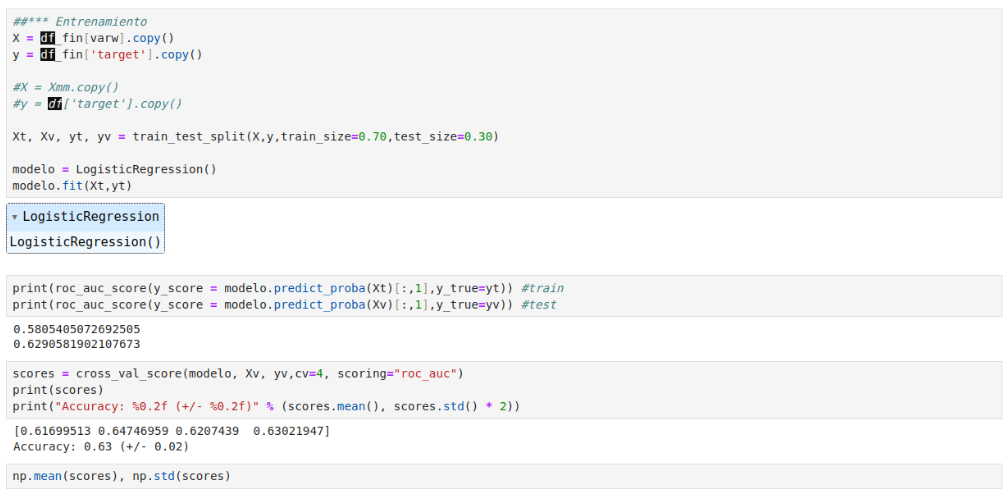

Debido a la falta de información para realizar el modelo, el score que se obtenía era muy bajo, pero considerando el .5 como el azar, obtener un score de .63 con una desviación estandar de .02, se considera positivo para el negocio.

Nuestro modelo tuvo mejores resultados en el segmento de validación, probando cuatro veces más obtuvimos siempre valores mayores a .60, a diferencia de otros modelos en los que obteníamos una ROC para ambos segmentos de .60, o .59. Por supuesto, se realizaron pruebas con cada modelo para ver cual era el que había ajustado mejor.

#### Scoring

In [43]:
# Leemos los archivos que guardamos para aplicar el Score
df_fin    = pd.read_excel('df_fin_11.xlsx')
df_varw   = pd.read_excel('variables_woe_11.xlsx')
varw      = df_varw.columns.tolist()
df        = pd.read_excel('df_11.xlsx')
X         = df[varw].copy()
modelo    = pickle.load(open('modelo_11.pkl', "rb"))

In [44]:
# Obtenemos nuestras betas y alphas del modelo seleccionado

#Coeficientes de la regresión logística
betas = list(modelo.coef_[0])

#Intercepto (Sesgo)
alpha = modelo.intercept_[0]

In [45]:
#Aplicamos la fórmula para asignar los puntos

PDO        = 30  
base_odds  = 4  
base_score = 800

factor = PDO/np.log(2)
offset = base_score-factor*np.log(base_odds)
n      = len(X.columns.tolist())

In [46]:
#Creamos las variables puntuadas
for k,v in enumerate(X.columns.tolist()):
    df['P_%s'%v[2:]] = ((-df[v]*betas[k]+alpha/n)*factor+offset/n)

In [47]:
df.head()

,c_FINANCED_AMOUNT,c_LOAN_TERM_MONTHLY,c_account_to_application_days,c_n_inquiries,c_n_inquiries_l3m,c_n_inquiries_l6m,c_MONTHLY_PAYMENT,c_PCT_3MINQ_TINQ,c_PCT_6MINQ_TINQ,c_PCT_3MINQ_6MINQ,c_account_to_application_hours,c_PCT_AMOUNT_TAMOUNT,c_PCT_AMOUNT_MEAN_AMOUNT,c_PCT_AMOUNT_TAMOUNT_E,c_PCT_AMOUNT_MEAN_AMOUNT_E,c_PCT_AMOUNT_TAMOUNT_NE,c_PCT_AMOUNT_MEAN_AMOUNT_NE,v_HAS_BC,v_CREATION_MONTH,v_APPLICATION_MONTH,...,W_c_PCT_6MINQ_TINQ,W_c_PCT_3MINQ_6MINQ,W_c_account_to_application_hours,W_c_PCT_AMOUNT_TAMOUNT,W_c_PCT_AMOUNT_MEAN_AMOUNT,W_c_PCT_AMOUNT_TAMOUNT_E,W_c_PCT_AMOUNT_MEAN_AMOUNT_E,W_c_PCT_AMOUNT_TAMOUNT_NE,W_c_PCT_AMOUNT_MEAN_AMOUNT_NE,P_v_APPLICATION_MONTH,P_v_CREATION_HOUR,P_c_FINANCED_AMOUNT,P_c_n_inquiries,P_c_n_inquiries_l6m,P_c_PCT_AMOUNT_TAMOUNT,P_c_PCT_AMOUNT_MEAN_AMOUNT,P_c_PCT_AMOUNT_TAMOUNT_E,P_c_PCT_AMOUNT_MEAN_AMOUNT_E,P_c_PCT_AMOUNT_TAMOUNT_NE,P_c_PCT_AMOUNT_MEAN_AMOUNT_NE
0,"(1888.75, 2777.5]","(4.8, 6.6]","(-0.902, 180.2]","(-0.192, 21.222]","(-0.171, 24.286]","(-0.171, 24.286]","(119.333, 430.728]","(0.5, 1.0]","(0.5, 1.0]","(0.5, 1.0]","(-38.333, 4315.88]","(6.85e-05, 0.000101]","(0.466, 0.686]","(0.000328, 0.000482]","(0.448, 0.658]","(8.66e-05, 0.000127]","(0.471, 0.693]",1,3,5,...,-0.028879,-0.002011,-0.05671,0.23109,0.23109,0.23109,0.23109,0.23109,0.23109,74.238827,63.589255,62.952732,66.751011,63.322205,62.952732,62.952732,62.952732,62.952732,62.952732,62.952732
1,"(1888.75, 2777.5]","(4.8, 6.6]","(-0.902, 180.2]","(-0.192, 21.222]","(-0.171, 24.286]","(-0.171, 24.286]","(119.333, 430.728]","(0.5, 1.0]","(0.5, 1.0]","(0.5, 1.0]","(-38.333, 4315.88]","(6.85e-05, 0.000101]","(0.466, 0.686]","(0.000328, 0.000482]","(0.448, 0.658]","(8.66e-05, 0.000127]","(0.471, 0.693]",1,3,4,...,-0.028879,-0.002011,-0.05671,0.23109,0.23109,0.23109,0.23109,0.23109,0.23109,66.736621,60.230147,62.952732,66.751011,63.322205,62.952732,62.952732,62.952732,62.952732,62.952732,62.952732
2,"(1888.75, 2777.5]","(4.8, 6.6]","(-0.902, 180.2]","(-0.192, 21.222]","(-0.171, 24.286]","(-0.171, 24.286]","(119.333, 430.728]","(0.5, 1.0]","(0.5, 1.0]","(0.5, 1.0]","(-38.333, 4315.88]","(6.85e-05, 0.000101]","(0.466, 0.686]","(0.000328, 0.000482]","(0.448, 0.658]","(8.66e-05, 0.000127]","(0.471, 0.693]",1,3,5,...,-0.028879,-0.002011,-0.05671,0.23109,0.23109,0.23109,0.23109,0.23109,0.23109,74.238827,63.950400,62.952732,66.751011,63.322205,62.952732,62.952732,62.952732,62.952732,62.952732,62.952732
3,"(1888.75, 2777.5]","(4.8, 6.6]","(-0.902, 180.2]","(-0.192, 21.222]","(-0.171, 24.286]","(-0.171, 24.286]","(119.333, 430.728]","(0.5, 1.0]","(0.5, 1.0]","(0.5, 1.0]","(-38.333, 4315.88]","(6.85e-05, 0.000101]","(0.466, 0.686]","(0.000328, 0.000482]","(0.448, 0.658]","(8.66e-05, 0.000127]","(0.471, 0.693]",1,11,12,...,-0.028879,-0.002011,-0.05671,0.23109,0.23109,0.23109,0.23109,0.23109,0.23109,58.490632,64.211243,62.952732,66.751011,63.322205,62.952732,62.952732,62.952732,62.952732,62.952732,62.952732
4,"(1888.75, 2777.5]","(4.8, 6.6]","(-0.902, 180.2]","(-0.192, 21.222]","(-0.171, 24.286]","(-0.171, 24.286]","(119.333, 430.728]","(0.5, 1.0]","(0.5, 1.0]","(0.5, 1.0]","(-38.333, 4315.88]","(6.85e-05, 0.000101]","(0.466, 0.686]","(0.000328, 0.000482]","(0.448, 0.658]","(8.66e-05, 0.000127]","(0.471, 0.693]",1,11,12,...,-0.028879,-0.002011,-0.05671,0.23109,0.23109,0.23109,0.23109,0.23109,0.23109,58.490632,64.211243,62.952732,66.751011,63.322205,62.952732,62.952732,62.952732,62.952732,62.952732,62.952732


In [48]:
varp = [v for v in df.columns if v[:2]=='P_']

In [49]:
df['score'] = df[varp].sum(axis=1)

<Axes: >

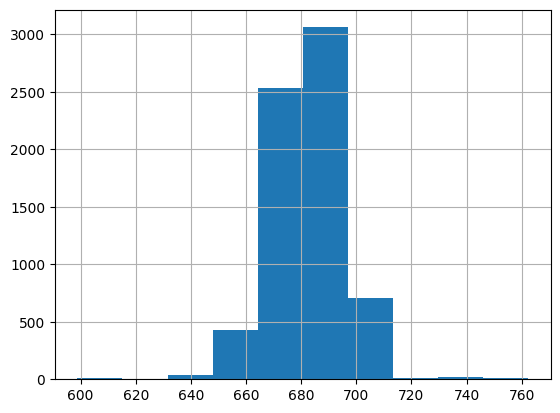

In [50]:
#Vemos la distrubución de nuestro score
df['score'].hist()

In [51]:
df['score'].describe(percentiles=[.01,.25,.5,.75,.99])

count    6806.000000
mean      682.297099
std        12.823153
min       598.827371
1%        650.997975
25%       674.663225
50%       682.385446
75%       690.281048
99%       709.179366
max       762.413051
Name: score, dtype: float64

In [52]:
# Aquí podemos ver los valores para cada variable
lst_dfs = []
for v in X.columns.tolist():    
    display(df[['W_'+v[2:],'P_'+v[2:],v[2:]]].groupby(v[2:]).max().reset_index().fillna(0))
    lst_dfs.append(df[['W_'+v[2:],'P_'+v[2:],v[2:]]].groupby(v[2:]).max().reset_index().fillna(0))

,v_APPLICATION_MONTH,W_v_APPLICATION_MONTH,P_v_APPLICATION_MONTH
0,1,-0.066216,59.760229
1,2,-0.019383,61.279785
2,3,0.043713,63.327041
3,4,0.148797,66.736621
4,5,0.380014,74.238827
5,6,0.459878,76.830115
6,7,0.182929,67.844084
7,8,0.199894,68.394557
8,9,-0.153822,56.917705
9,10,-0.352273,50.478665


,v_CREATION_HOUR,W_v_CREATION_HOUR,P_v_CREATION_HOUR
0,0,0.076723,64.256989
1,1,-0.334573,51.668206
2,2,-0.465602,47.657745
3,3,-0.311451,52.375927
4,4,-0.976427,32.022600
5,5,0.004402,62.043428
6,6,-0.108927,58.574709
7,7,0.158553,66.761610
8,8,-0.063651,59.960475
9,9,0.049659,63.428623


,c_FINANCED_AMOUNT,W_c_FINANCED_AMOUNT,P_c_FINANCED_AMOUNT
0,"(1888.75, 2777.5]",0.231090,62.952732
1,"(2777.5, 3666.25]",0.093336,62.330372
2,"(3666.25, 4555.0]",0.059853,62.179103
3,"(4555.0, 5443.75]",-0.153137,61.216833
4,"(5443.75, 6332.5]",-0.314594,60.487387
5,"(6332.5, 7221.25]",0.038304,62.081743
6,"(7221.25, 8110.0]",-0.456944,59.844264
7,"(8110.0, 8998.75]",-0.390700,60.143545
8,"(992.0, 1888.75]",1.876204,70.385202


,c_n_inquiries,W_c_n_inquiries,P_c_n_inquiries
0,"(-0.192, 21.222]",0.175185,66.751011
1,"(106.111, 127.333]",-0.214287,55.985539
2,"(127.333, 148.556]",0.697549,81.189785
3,"(148.556, 169.778]",-1.605036,17.543584
4,"(169.778, 191.0]",0.004402,62.030369
5,"(21.222, 42.444]",-0.109972,58.868925
6,"(42.444, 63.667]",-0.161725,57.438424
7,"(63.667, 84.889]",-0.279663,54.178462
8,"(84.889, 106.111]",-0.370291,51.673395


,c_n_inquiries_l6m,W_c_n_inquiries_l6m,P_c_n_inquiries_l6m
0,"(-0.171, 24.286]",0.077225,63.322205
1,"(121.429, 145.714]",0.227546,66.073675
2,"(145.714, 170.0]",-1.718365,30.455826
3,"(24.286, 48.571]",-0.179668,58.620061
4,"(48.571, 72.857]",-0.103887,60.007153
5,"(72.857, 97.143]",-0.605364,50.828145
6,"(97.143, 121.429]",-0.608702,50.767030


,c_PCT_AMOUNT_TAMOUNT,W_c_PCT_AMOUNT_TAMOUNT,P_c_PCT_AMOUNT_TAMOUNT
0,"(-0.000964, 6.85e-05]",1.876204,70.385202
1,"(0.000101, 0.000133]",0.093336,62.330372
2,"(0.000133, 0.000165]",0.059853,62.179103
3,"(0.000165, 0.000197]",-0.153137,61.216833
4,"(0.000197, 0.00023]",-0.314594,60.487387
5,"(0.00023, 0.000262]",0.038304,62.081743
6,"(0.000262, 0.000294]",-0.456944,59.844264
7,"(0.000294, 0.000326]",-0.390700,60.143545
8,"(6.85e-05, 0.000101]",0.231090,62.952732


,c_PCT_AMOUNT_MEAN_AMOUNT,W_c_PCT_AMOUNT_MEAN_AMOUNT,P_c_PCT_AMOUNT_MEAN_AMOUNT
0,"(0.244, 0.466]",1.876204,70.385202
1,"(0.466, 0.686]",0.231090,62.952732
2,"(0.686, 0.905]",0.093336,62.330372
3,"(0.905, 1.124]",0.059853,62.179103
4,"(1.124, 1.344]",-0.153137,61.216833
5,"(1.344, 1.563]",-0.314594,60.487387
6,"(1.563, 1.783]",0.038304,62.081743
7,"(1.783, 2.002]",-0.456944,59.844264
8,"(2.002, 2.221]",-0.390700,60.143545


,c_PCT_AMOUNT_TAMOUNT_E,W_c_PCT_AMOUNT_TAMOUNT_E,P_c_PCT_AMOUNT_TAMOUNT_E
0,"(-0.000828, 0.000328]",1.876204,70.385202
1,"(0.000328, 0.000482]",0.231090,62.952732
2,"(0.000482, 0.000636]",0.093336,62.330372
3,"(0.000636, 0.00079]",0.059853,62.179103
4,"(0.00079, 0.000945]",-0.153137,61.216833
5,"(0.000945, 0.0011]",-0.314594,60.487387
6,"(0.0011, 0.00125]",0.038304,62.081743
7,"(0.00125, 0.00141]",-0.456944,59.844264
8,"(0.00141, 0.00156]",-0.390700,60.143545


,c_PCT_AMOUNT_MEAN_AMOUNT_E,W_c_PCT_AMOUNT_MEAN_AMOUNT_E,P_c_PCT_AMOUNT_MEAN_AMOUNT_E
0,"(0.23399999999999999, 0.448]",1.876204,70.385202
1,"(0.448, 0.658]",0.231090,62.952732
2,"(0.658, 0.869]",0.093336,62.330372
3,"(0.869, 1.08]",0.059853,62.179103
4,"(1.08, 1.29]",-0.153137,61.216833
5,"(1.29, 1.501]",-0.314594,60.487387
6,"(1.501, 1.711]",0.038304,62.081743
7,"(1.711, 1.922]",-0.456944,59.844264
8,"(1.922, 2.133]",-0.390700,60.143545


,c_PCT_AMOUNT_TAMOUNT_NE,W_c_PCT_AMOUNT_TAMOUNT_NE,P_c_PCT_AMOUNT_TAMOUNT_NE
0,"(-0.0009545, 8.66e-05]",1.876204,70.385202
1,"(0.000127, 0.000168]",0.093336,62.330372
2,"(0.000168, 0.000209]",0.059853,62.179103
3,"(0.000209, 0.00025]",-0.153137,61.216833
4,"(0.00025, 0.00029]",-0.314594,60.487387
5,"(0.00029, 0.000331]",0.038304,62.081743
6,"(0.000331, 0.000372]",-0.456944,59.844264
7,"(0.000372, 0.000413]",-0.390700,60.143545
8,"(8.66e-05, 0.000127]",0.231090,62.952732


,c_PCT_AMOUNT_MEAN_AMOUNT_NE,W_c_PCT_AMOUNT_MEAN_AMOUNT_NE,P_c_PCT_AMOUNT_MEAN_AMOUNT_NE
0,"(0.246, 0.471]",1.876204,70.385202
1,"(0.471, 0.693]",0.231090,62.952732
2,"(0.693, 0.915]",0.093336,62.330372
3,"(0.915, 1.136]",0.059853,62.179103
4,"(1.136, 1.358]",-0.153137,61.216833
5,"(1.358, 1.58]",-0.314594,60.487387
6,"(1.58, 1.801]",0.038304,62.081743
7,"(1.801, 2.023]",-0.456944,59.844264
8,"(2.023, 2.245]",-0.390700,60.143545


In [53]:
#Guardamos nuestra score card
df_score_card = pd.concat(lst_dfs,axis=1)
df_score_card#.to_excel('score_card_11.xlsx',index=False)

,v_APPLICATION_MONTH,W_v_APPLICATION_MONTH,P_v_APPLICATION_MONTH,v_CREATION_HOUR,W_v_CREATION_HOUR,P_v_CREATION_HOUR,c_FINANCED_AMOUNT,W_c_FINANCED_AMOUNT,P_c_FINANCED_AMOUNT,c_n_inquiries,W_c_n_inquiries,P_c_n_inquiries,c_n_inquiries_l6m,W_c_n_inquiries_l6m,P_c_n_inquiries_l6m,c_PCT_AMOUNT_TAMOUNT,W_c_PCT_AMOUNT_TAMOUNT,P_c_PCT_AMOUNT_TAMOUNT,c_PCT_AMOUNT_MEAN_AMOUNT,W_c_PCT_AMOUNT_MEAN_AMOUNT,P_c_PCT_AMOUNT_MEAN_AMOUNT,c_PCT_AMOUNT_TAMOUNT_E,W_c_PCT_AMOUNT_TAMOUNT_E,P_c_PCT_AMOUNT_TAMOUNT_E,c_PCT_AMOUNT_MEAN_AMOUNT_E,W_c_PCT_AMOUNT_MEAN_AMOUNT_E,P_c_PCT_AMOUNT_MEAN_AMOUNT_E,c_PCT_AMOUNT_TAMOUNT_NE,W_c_PCT_AMOUNT_TAMOUNT_NE,P_c_PCT_AMOUNT_TAMOUNT_NE,c_PCT_AMOUNT_MEAN_AMOUNT_NE,W_c_PCT_AMOUNT_MEAN_AMOUNT_NE,P_c_PCT_AMOUNT_MEAN_AMOUNT_NE
0,1.0,-0.066216,59.760229,0,0.076723,64.256989,"(1888.75, 2777.5]",0.231090,62.952732,"(-0.192, 21.222]",0.175185,66.751011,"(-0.171, 24.286]",0.077225,63.322205,"(-0.000964, 6.85e-05]",1.876204,70.385202,"(0.244, 0.466]",1.876204,70.385202,"(-0.000828, 0.000328]",1.876204,70.385202,"(0.23399999999999999, 0.448]",1.876204,70.385202,"(-0.0009545, 8.66e-05]",1.876204,70.385202,"(0.246, 0.471]",1.876204,70.385202
1,2.0,-0.019383,61.279785,1,-0.334573,51.668206,"(2777.5, 3666.25]",0.093336,62.330372,"(106.111, 127.333]",-0.214287,55.985539,"(121.429, 145.714]",0.227546,66.073675,"(0.000101, 0.000133]",0.093336,62.330372,"(0.466, 0.686]",0.231090,62.952732,"(0.000328, 0.000482]",0.231090,62.952732,"(0.448, 0.658]",0.231090,62.952732,"(0.000127, 0.000168]",0.093336,62.330372,"(0.471, 0.693]",0.231090,62.952732
2,3.0,0.043713,63.327041,2,-0.465602,47.657745,"(3666.25, 4555.0]",0.059853,62.179103,"(127.333, 148.556]",0.697549,81.189785,"(145.714, 170.0]",-1.718365,30.455826,"(0.000133, 0.000165]",0.059853,62.179103,"(0.686, 0.905]",0.093336,62.330372,"(0.000482, 0.000636]",0.093336,62.330372,"(0.658, 0.869]",0.093336,62.330372,"(0.000168, 0.000209]",0.059853,62.179103,"(0.693, 0.915]",0.093336,62.330372
3,4.0,0.148797,66.736621,3,-0.311451,52.375927,"(4555.0, 5443.75]",-0.153137,61.216833,"(148.556, 169.778]",-1.605036,17.543584,"(24.286, 48.571]",-0.179668,58.620061,"(0.000165, 0.000197]",-0.153137,61.216833,"(0.905, 1.124]",0.059853,62.179103,"(0.000636, 0.00079]",0.059853,62.179103,"(0.869, 1.08]",0.059853,62.179103,"(0.000209, 0.00025]",-0.153137,61.216833,"(0.915, 1.136]",0.059853,62.179103
4,5.0,0.380014,74.238827,4,-0.976427,32.022600,"(5443.75, 6332.5]",-0.314594,60.487387,"(169.778, 191.0]",0.004402,62.030369,"(48.571, 72.857]",-0.103887,60.007153,"(0.000197, 0.00023]",-0.314594,60.487387,"(1.124, 1.344]",-0.153137,61.216833,"(0.00079, 0.000945]",-0.153137,61.216833,"(1.08, 1.29]",-0.153137,61.216833,"(0.00025, 0.00029]",-0.314594,60.487387,"(1.136, 1.358]",-0.153137,61.216833
5,6.0,0.459878,76.830115,5,0.004402,62.043428,"(6332.5, 7221.25]",0.038304,62.081743,"(21.222, 42.444]",-0.109972,58.868925,"(72.857, 97.143]",-0.605364,50.828145,"(0.00023, 0.000262]",0.038304,62.081743,"(1.344, 1.563]",-0.314594,60.487387,"(0.000945, 0.0011]",-0.314594,60.487387,"(1.29, 1.501]",-0.314594,60.487387,"(0.00029, 0.000331]",0.038304,62.081743,"(1.358, 1.58]",-0.314594,60.487387
6,7.0,0.182929,67.844084,6,-0.108927,58.574709,"(7221.25, 8110.0]",-0.456944,59.844264,"(42.444, 63.667]",-0.161725,57.438424,"(97.143, 121.429]",-0.608702,50.767030,"(0.000262, 0.000294]",-0.456944,59.844264,"(1.563, 1.783]",0.038304,62.081743,"(0.0011, 0.00125]",0.038304,62.081743,"(1.501, 1.711]",0.038304,62.081743,"(0.000331, 0.000372]",-0.456944,59.844264,"(1.58, 1.801]",0.038304,62.081743
7,8.0,0.199894,68.394557,7,0.158553,66.761610,"(8110.0, 8998.75]",-0.390700,60.143545,"(63.667, 84.889]",-0.279663,54.178462,NaN,NaN,NaN,"(0.000294, 0.000326]",-0.390700,60.143545,"(1.783, 2.002]",-0.456944,59.844264,"(0.00125, 0.00141]",-0.456944,59.844264,"(1.711, 1.922]",-0.456944,59.844264,"(0.000372, 0.000413]",-0.390700,60.143545,"(1.801, 2.023]",-0.456944,59.844264
8,9.0,-0.153822,56.917705,8,-0.063651,59.960475,"(992.0, 1888.75]",1.876

Realizamos cortes a nuestro score para ver la distribución de eventos y no eventos

In [54]:
df['r_score'] = pd.cut(df['score'],bins=6,include_lowest=True).astype(str)

In [55]:
aux     = df[['r_score','target']].copy()
aux['n']= 1

In [56]:
aux= aux.pivot_table(index='r_score',columns='target',values='n',aggfunc='sum')

In [57]:
#Guardamos la distribución de nuestro score
aux#.to_excel('SCORE_11_6.xlsx')

target,0,1
r_score,,
"(598.663, 626.092]",1.0,8.0
"(626.092, 653.356]",63.0,30.0
"(653.356, 680.62]",2205.0,701.0
"(680.62, 707.884]",3081.0,619.0
"(707.884, 735.149]",69.0,8.0
"(735.149, 762.413]",21.0,NaN


Guardamos el dataset con todas nuestras variables.

In [58]:
varnormal = [i[2:] for i in X.columns.tolist()]
varwoe    = X.columns.tolist()
varpuntos = ['P_'+i[2:] for i in X.columns.tolist()]
variables_evaluacion = varnormal+varwoe+varpuntos

In [59]:
df_scoring = df[variables_evaluacion].copy()

In [ ]:
df_scoring#.to_excel('df_valores_scoring_11.xlsx',index=False)